<a href="https://colab.research.google.com/github/nachoacev/practice-data-science/blob/main/DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Seaborn

In this hands-on notebook, we'll learn how to take our data visualizations to the next level with `seaborn`, a powerful but easy-to-use data visualization tool.

In [24]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [25]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alexisbcook/data-for-datavis")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/alexisbcook/data-for-datavis/versions/2


<Axes: xlabel='Date'>

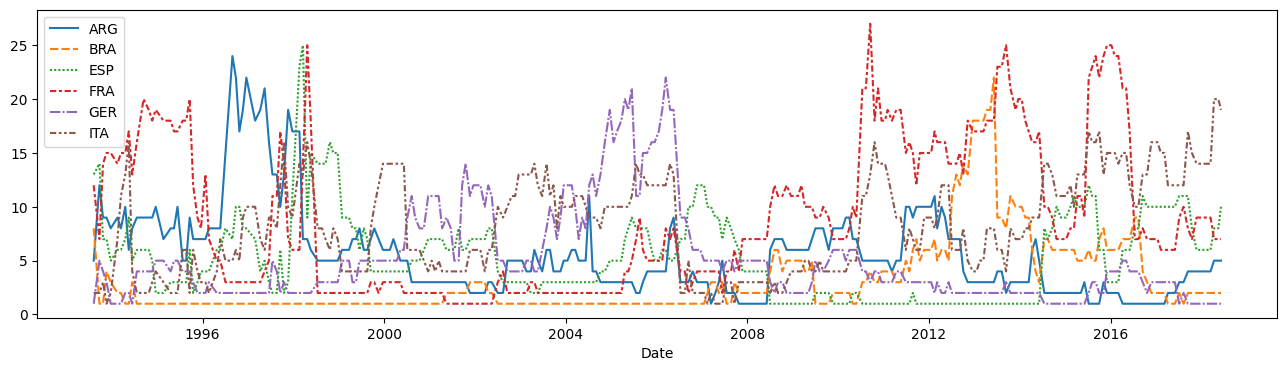

In [26]:
# Path of the file to read
fifa_filepath = path + "/fifa.csv"

# Read the file into a variable fifa_data
fifa_data = pd.read_csv(fifa_filepath, index_col='Date', parse_dates=True)

# Set the width and height of the figure
plt.figure(figsize=(16, 4))

# Line chart showing how FIFA rankings evolved over time
sns.lineplot(data=fifa_data)


# Line Charts

We will create professional looking line charts in `Python`.

In [27]:
# Path of the file to read
spotify_filepath = path + "/spotify.csv"

# Read the file into a variable
spotify_data = pd.read_csv(spotify_filepath, index_col='Date', parse_dates=True)

In [28]:
spotify_data.head()

,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
Date,,,,,
2017-01-06,12287078,NaN,NaN,NaN,NaN
2017-01-07,13190270,NaN,NaN,NaN,NaN
2017-01-08,13099919,NaN,NaN,NaN,NaN
2017-01-09,14506351,NaN,NaN,NaN,NaN
2017-01-10,14275628,NaN,NaN,NaN,NaN


<Axes: title={'center': 'Daily Global Streams of Popular Songs in 2017-2018'}, xlabel='Date'>

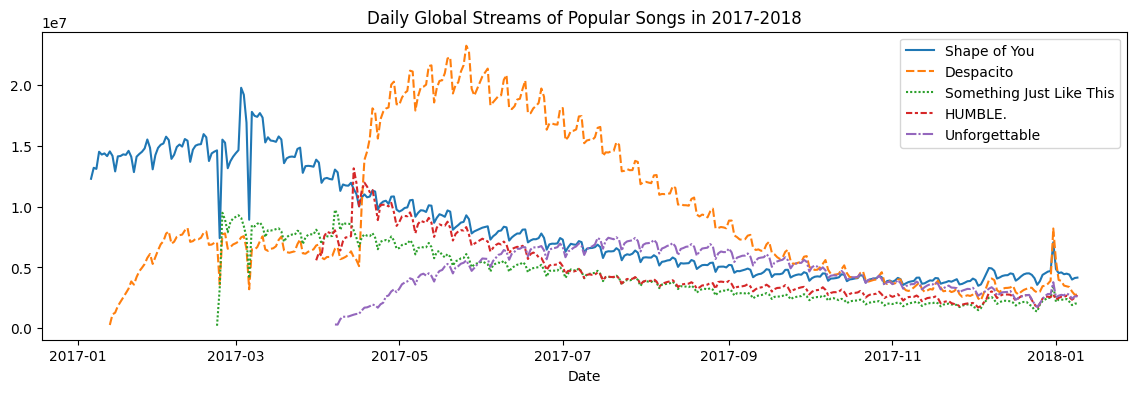

In [29]:
# Set the width and height of the figure
plt.figure(figsize=(14, 4))

# Add title
plt.title('Daily Global Streams of Popular Songs in 2017-2018')

# Line chart showing daily global streams of each song
sns.lineplot(data=spotify_data)

Text(0.5, 0, 'Date')

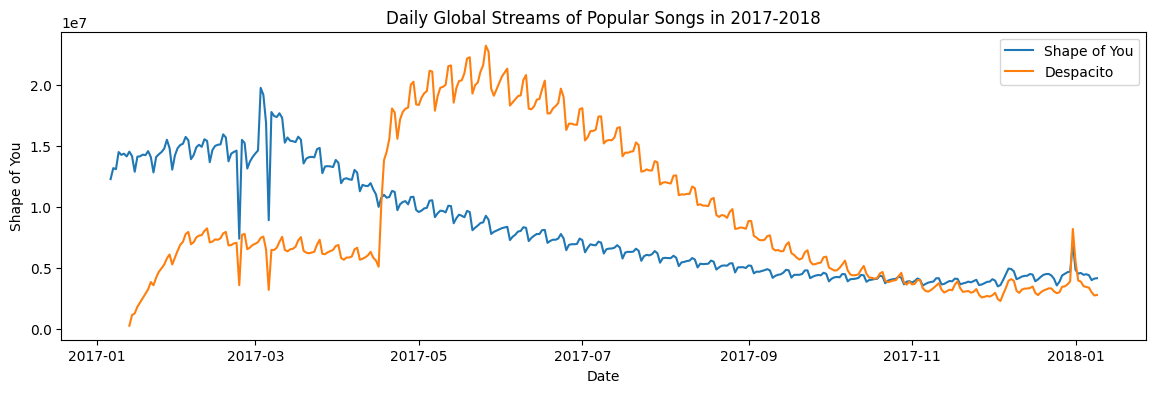

In [30]:
# Set the width and height of the figure
plt.figure(figsize=(14, 4))

# Add title
plt.title('Daily Global Streams of Popular Songs in 2017-2018')

# Line chart showing the daily streams of 'Shape of You'
sns.lineplot(data=spotify_data['Shape of You'], label='Shape of You')

# Line chart showing the daily streams of 'Despacito'
sns.lineplot(data=spotify_data['Despacito'], label='Despacito')

# Add label for horizontal axis
plt.xlabel('Date')


# Bar Charts and Heatmaps

In [31]:
# Path of the file to read
flight_filepath = path + "/flight_delays.csv"

# Read the file into a variable flight_data
flight_data = pd.read_csv(flight_filepath, index_col="Month")

Text(0, 0.5, 'Arrival delay (min)')

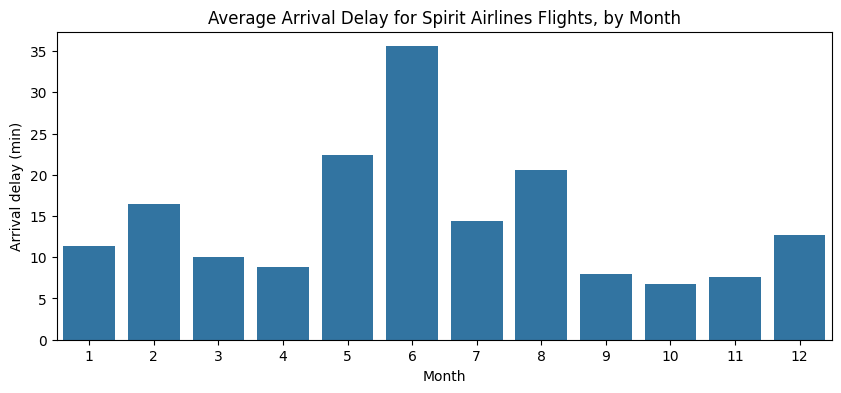

In [32]:
# Set the width and height of the figure
plt.figure(figsize=(10, 4))

# Add title
plt.title("Average Arrival Delay for Spirit Airlines Flights, by Month")

# Bar chart showing average arrival delay sor Spirit Airlines Flights by month
sns.barplot(x=flight_data.index, y=flight_data['NK'])

# Add label for vertical axis
plt.ylabel("Arrival delay (min)")

Text(0.5, 47.7222222222222, 'Airline')

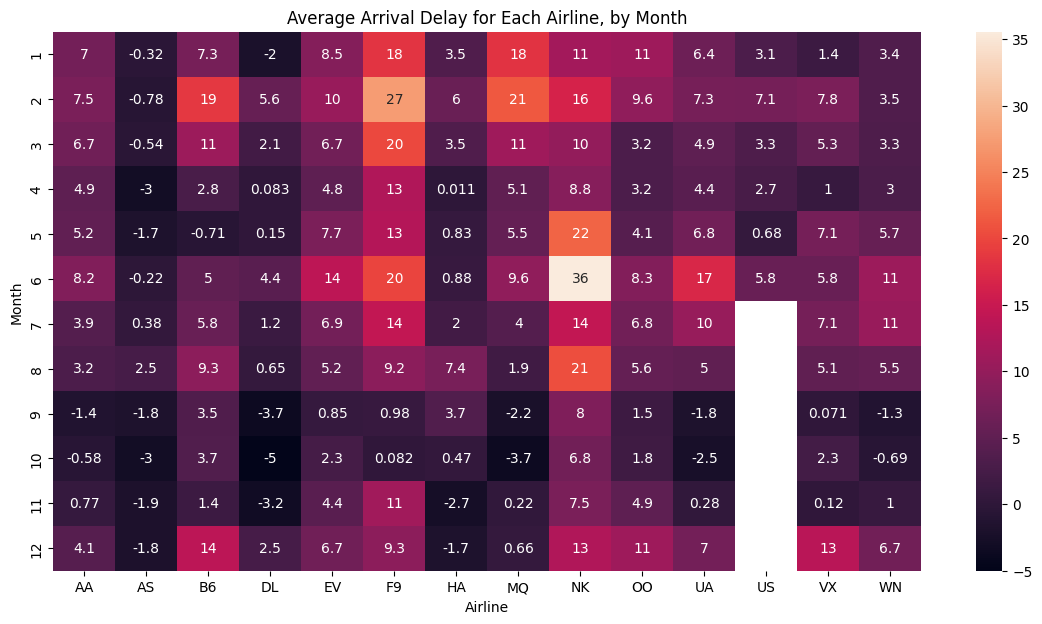

In [33]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("Average Arrival Delay for Each Airline, by Month")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=flight_data, annot=True)

# Add label for horizontala axis
plt.xlabel("Airline")

# Scatter Plots

To create a simple scatter plot, we use the `sns.scatterplot` command and specify the values.

In [34]:
# Path of the file to read
insurance_filepath = path + "/insurance.csv"

# Read the file into a variable insurance_data
insurance_data = pd.read_csv(insurance_filepath)

In [35]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## `sns.scatterplot()` and `sns.regplot()`

<Axes: xlabel='bmi', ylabel='charges'>

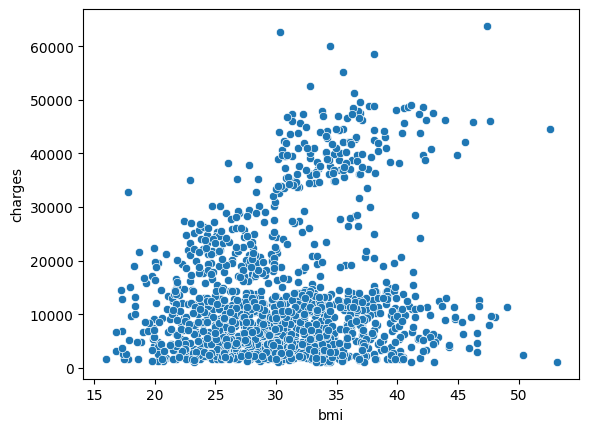

In [36]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'])

The scatterplot above suggests that *body mass index* (BMI) and *insurance charges* **are positively correlated**, where customers with higher BMI typically also tend to pay more in insurance costs. (This pattern makes sense, since high BMI is typically associated with higher risk of chronic disease.)

To double-check the strength of this relationship, **we might like to add a regression line, or the line that best fits the data**. We do this by changing the command to `sns.regplot`.

<Axes: xlabel='bmi', ylabel='charges'>

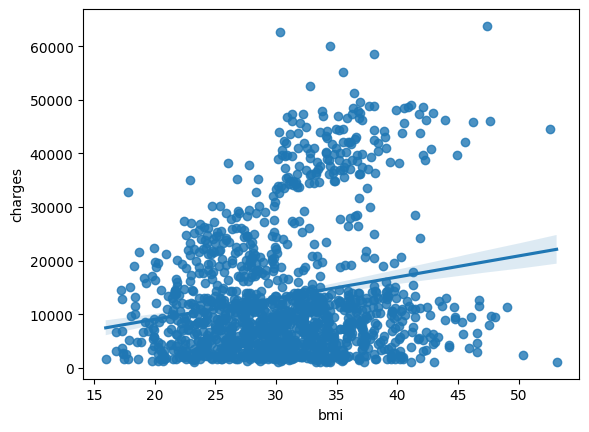

In [37]:
sns.regplot(x=insurance_data['bmi'], y=insurance_data['charges'])

## Color-Coded Scatter Plots `sns.lmplot()`

We can use scatter plots to display the relationships between (not two, but...) three variables. One way of doing this is by color-coding the points.

For instance, to understand how smoking affects the relationship between BMI and insurance costs, **we can color-code the points** by 'smoker', and plot the other two columns ('bmi', 'charges') on the axes.

<Axes: xlabel='bmi', ylabel='charges'>

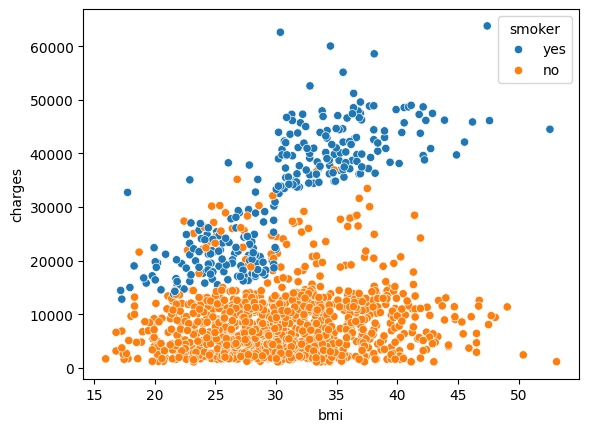

In [38]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'], hue=insurance_data['smoker'])

This scatter plot shows that while nonsmokers to tend to pay slightly more with increasing BMI, **smokers pay MUCH mor**e.

**To further emphasize this fact, we can use the `sns.lmplot` command to add two regression lines**, corresponding to smokers and nonsmokers. (We'll notice that the regression line for smokers has a much steeper slope, relative to the line for nonsmokers!)

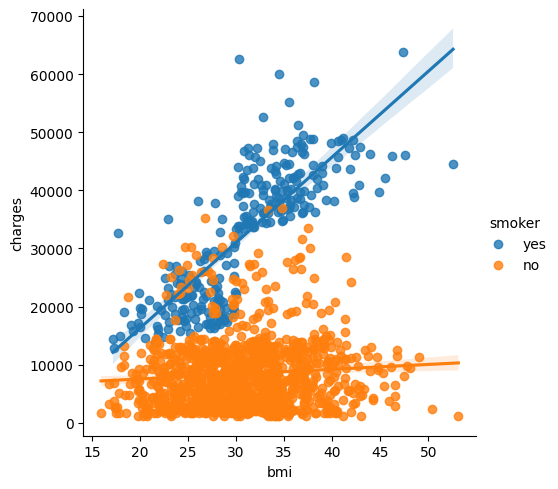

In [39]:
sns.lmplot(x='bmi', y='charges', hue='smoker', data=insurance_data)

## Categorical Scatter Plot `sns.swarmplot()`

Finally, there's one more plot that you'll learn about, that might look slightly different from how you're used to seeing scatter plots. Usually, we use scatter plots to highlight the relationship between two continuous variables (like "bmi" and "charges").

However, we can adapt the design of the scatter plot to feature a categorical variable (like "smoker") on one of the main axes. We'll refer to this plot type as a categorical scatter plot, and we build it with the `sns.swarmplot` command.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='smoker', ylabel='charges'>

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


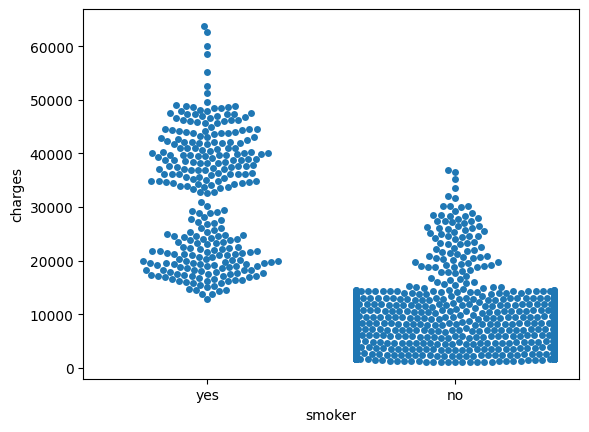

In [40]:
sns.swarmplot(x=insurance_data['smoker'], y=insurance_data['charges'])

# Distributions

We'll learn all about histograms and density plots.

In [41]:
# Path of the file to read
iris_filepath = path + "/iris.csv"

# Read the file into a variable iris_data
iris_data = pd.read_csv(iris_filepath, index_col="Id")

# Print the first 5 rows of the data
iris_data.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## Histograms `sns.histplot`
Say we would like to create a **histogram** to see how the petal lenght varies in iris flowers. We can do this with the `sns.histplot` command.

<Axes: xlabel='Petal Length (cm)', ylabel='Count'>

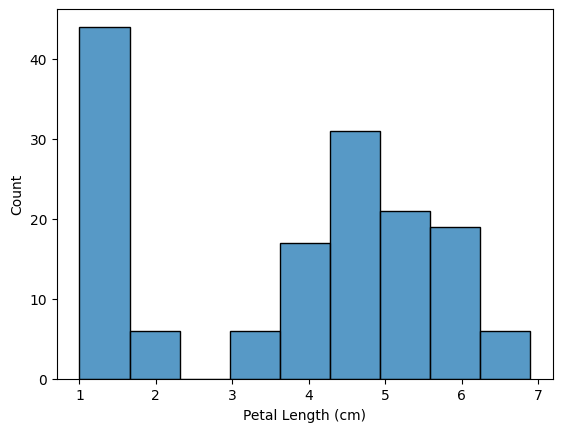

In [42]:
# Histogram
sns.histplot(data=iris_data['Petal Length (cm)'])

## Density Plots `sns.kdeplot`
The next type of plot is a **kernel density estimate (KDE)** plot. In case you're not familiar with KDE plots, you can think of it as a smoothed histogram.

To make a KDE plot, we use the `sns.kdeplot` command. Setting shade=True colors the area below the curve (and `data=` *chooses the column we would like to plot*).

<ipython-input-43-b482038bd7a2>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=iris_data['Petal Length (cm)'], shade=True)


<Axes: xlabel='Petal Length (cm)', ylabel='Density'>

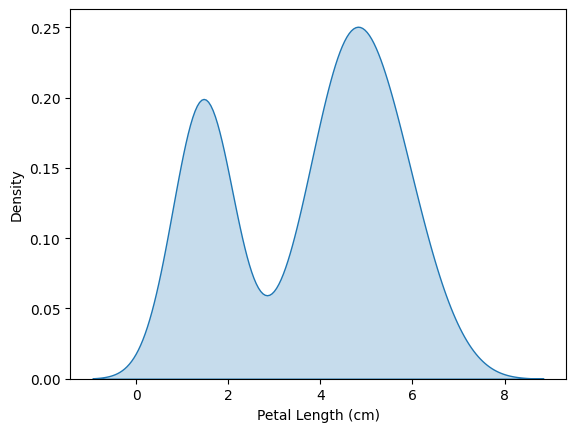

In [43]:
# KDE plot
sns.kdeplot(data=iris_data['Petal Length (cm)'], shade=True)

## 2D KDE Plots `sns.jointplot`
We're not restricted to a single column when creating a KDE plot. We can create a **two-dimensional (2D) KDE plot** with the `sns.jointplot` command.

In the plot below, the color-coding shows us how likely we are to see different combinations of sepal width and petal length, where darker parts of the figure are more likely.

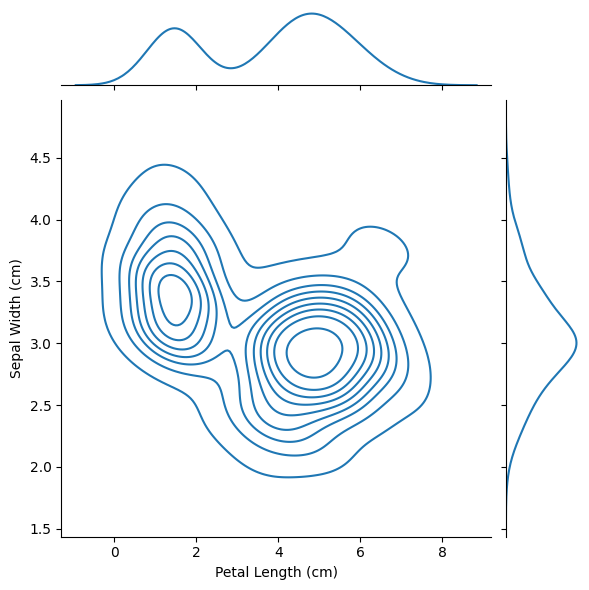

In [44]:
# 2D KDE plot
sns.jointplot(x=iris_data['Petal Length (cm)'], y=iris_data['Sepal Width (cm)'], kind='kde')

Note that in addition to the 2D KDE plot in the center,

- the curve at the top of the figure is a KDE plot for the data on the x-axis (in this case, `iris_data['Petal Length (cm)']`).
- the curve on the right of the figure is a KDE plot for the data on the y-axis (in this case, `iris_data['Sepal Width (cm)']`).

## Color-coded Plots

For the next part of the tutorial, we'll create plots to understand differences between the species.

We can create three different histograms (one for each species) of petal length by using the `sns.histplot` command (*as above*).

- `data=` provides the name of the variable that we used to read in the data
- `x=` sets the name of column with the data we want to plot
- `hue=` sets the column we'll use to split the data into different histograms

Text(0.5, 1.0, 'Histogram of Petal Lengths, by Species')

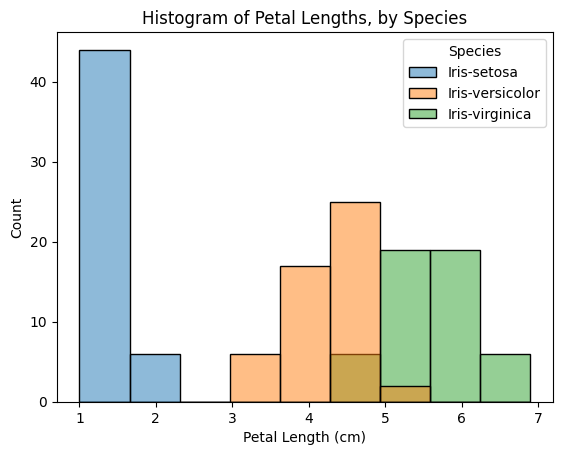

In [45]:
# Histogram for each species
sns.histplot(data=iris_data, x='Petal Length (cm)', hue='Species')

# Add title
plt.title("Histogram of Petal Lengths, by Species")

We can also create a KDE plot for each species by using `sns.kdeplot` (as above). The functionality for data, x, and hue are identical to when we used sns.histplot above. Additionally, we set `shade=True` to color the area below each curve.

<ipython-input-46-d48bbd81a0fc>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=iris_data, x='Petal Length (cm)', hue='Species', shade=True)


Text(0.5, 1.0, 'Distribution of Petal Lengths, by Species')

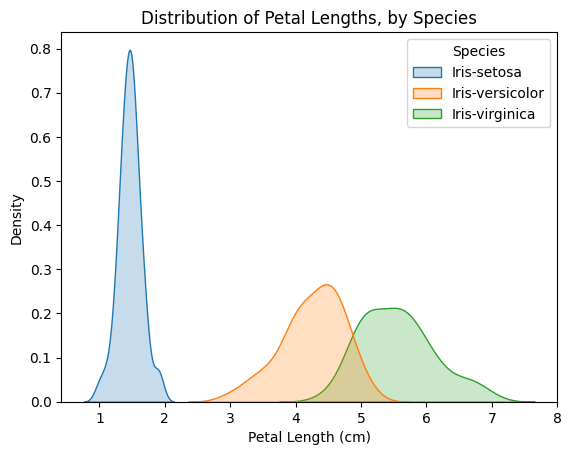

In [46]:
# KDE plots for each species
sns.kdeplot(data=iris_data, x='Petal Length (cm)', hue='Species', shade=True)

# Add title
plt.title("Distribution of Petal Lengths, by Species")

One interesting pattern that can be seen in plots is that the plants seem to belong to one of two groups, where Iris versicolor and Iris virginica seem to have similar values for petal length, while Iris setosa belongs in a category all by itself.

In fact, according to this dataset, we might even be able to classify any iris plant as Iris setosa (as opposed to Iris versicolor or Iris virginica) just by looking at the petal length: if the petal length of an iris flower is less than 2 cm, it's most likely to be Iris setosa!

# Choosing Plot Types and Custom Styles

We've learned how to create many different chart types. Now, we'll organize our knowledge, before learning some quick commands that we can use to change the style of our charts.

Since it's not always easy to decide how to best tell the story behind your data, we've broken the chart types into three broad categories to help with this.

## Summary

- **Trends** - A trend is defined as a pattern of change.
  - `sns.lineplot` - **Line charts** are best *to show trends over a period of time*, and multiple lines can be used to show trends in more than one group.
- **Relationship** - There are many different chart types that you can use to understand relationships between variables in your data.
  - `sns.barplot` - **Bar charts** are useful for *comparing quantities corresponding to different groups*.
  - `sns.heatmap` - **Heatmaps** can be used *to find color-coded patterns in tables of numbers*.
  - `sns.scatterplot` - **Scatter plots** show the *relationship between two continuous variables*; if color-coded, we can also show the relationship with a third categorical variable.
  - `sns.regplot` - Including a **regression line** in the scatter plot makes it easier *to see any linear relationship between two variables*.
  - `sns.lmplot` - This command is useful for drawing **multiple regression lines**, if the scatter plot contains multiple, color-coded groups.
  - `sns.swarmplot` - **Categorical scatter plots** show the *relationship between a continuous variable and a categorical variable*.

- **Distribution** - We visualize distributions to show the possible values that we can expect to see in a variable, along with how likely they are.
  - `sns.histplot` - **Histograms** show the distribution of a single numerical variable.
  - `sns.kdeplot` - **KDE plots** (or **2D KDE plots**) show an estimated, *smooth distribution of a single numerical variable* (or two numerical variables).
  - `sns.jointplot` - This command is useful for simultaneously displaying a 2D KDE plot with the corresponding KDE plots for each individual variable.

## Changing styles with seaborn `sns.set_style()`



<Axes: xlabel='Date'>

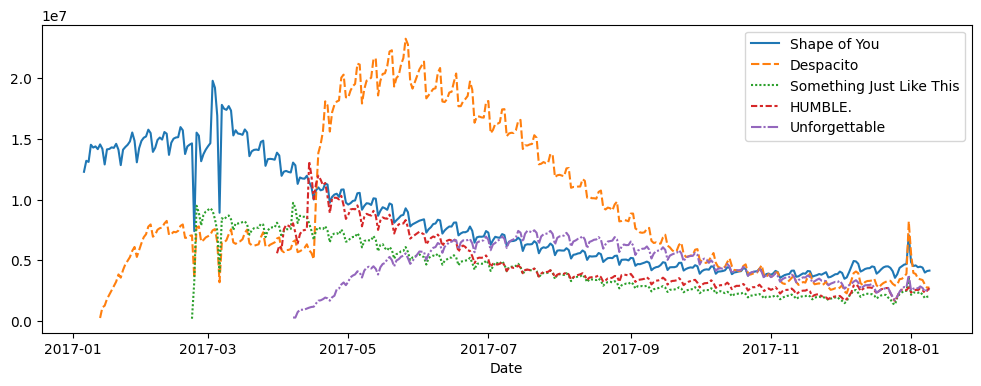

In [48]:
# Path of the file to read
spotify_filepath = path + "/spotify.csv"

# Read the file into a variable spotify_data
spotify_data = pd.read_csv(spotify_filepath, index_col="Date", parse_dates=True)

# Line chart
plt.figure(figsize=(12,4))
sns.lineplot(data=spotify_data)

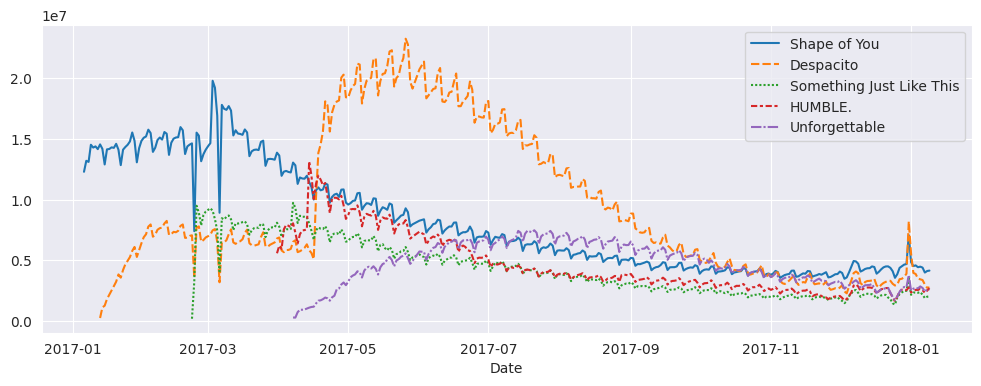

In [50]:
# Change the style of the figure to the "dark" theme
sns.set_style('dark')

# Line chart
plt.figure(figsize=(12, 4))
sns.lineplot(data=spotify_data)
plt.grid()